In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from typing import Tuple

In [2]:
def makeSimpleResNetModel(inputShape: Tuple[int]) -> keras.Model:
    """
    Source: https://www.tensorflow.org/guide/keras/functional#a_toy_resnet_model
    
    Note that I tend to prefer the super-explicit (if somewhat verbose) style. 
    This style is technically unnecessary, but it helps with readability.
    """
    inputs = keras.Input(shape=inputShape, name="Input")
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(inputs)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
    block_1_output = layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x)

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(block_1_output)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(x)
    block_2_output = layers.add([x, block_1_output])

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(block_2_output)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(x)
    block_3_output = layers.add([x, block_2_output])

    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dense(units=256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units=2, activation="softmax")(x)

    return keras.Model(inputs=inputs, outputs=outputs, name="Simple_ResNet")

In [3]:
def makeAlexNet():
    #Build Model
    AlexNet = Sequential()

    #1st Convolutional Layer
    AlexNet.add(Convolution2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11), strides=(4,4), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #2nd Convolutional Layer
    AlexNet.add(Convolution2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #3rd Convolutional Layer
    AlexNet.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #4th Convolutional Layer
    AlexNet.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))

    #5th Convolutional Layer
    AlexNet.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

    #Passing it to a Fully Connected layer
    AlexNet.add(Flatten())
    # 1st Fully Connected Layer
    AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    AlexNet.add(Dropout(0.4))

    #2nd Fully Connected Layer
    AlexNet.add(Dense(4096))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4))

    #3rd Fully Connected Layer
    AlexNet.add(Dense(1000))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('relu'))
    #Add Dropout
    AlexNet.add(Dropout(0.4))

    #Output Layer
    AlexNet.add(Dense(1))
    AlexNet.add(BatchNormalization())
    AlexNet.add(Activation('sigmoid'))
    return AlexNet

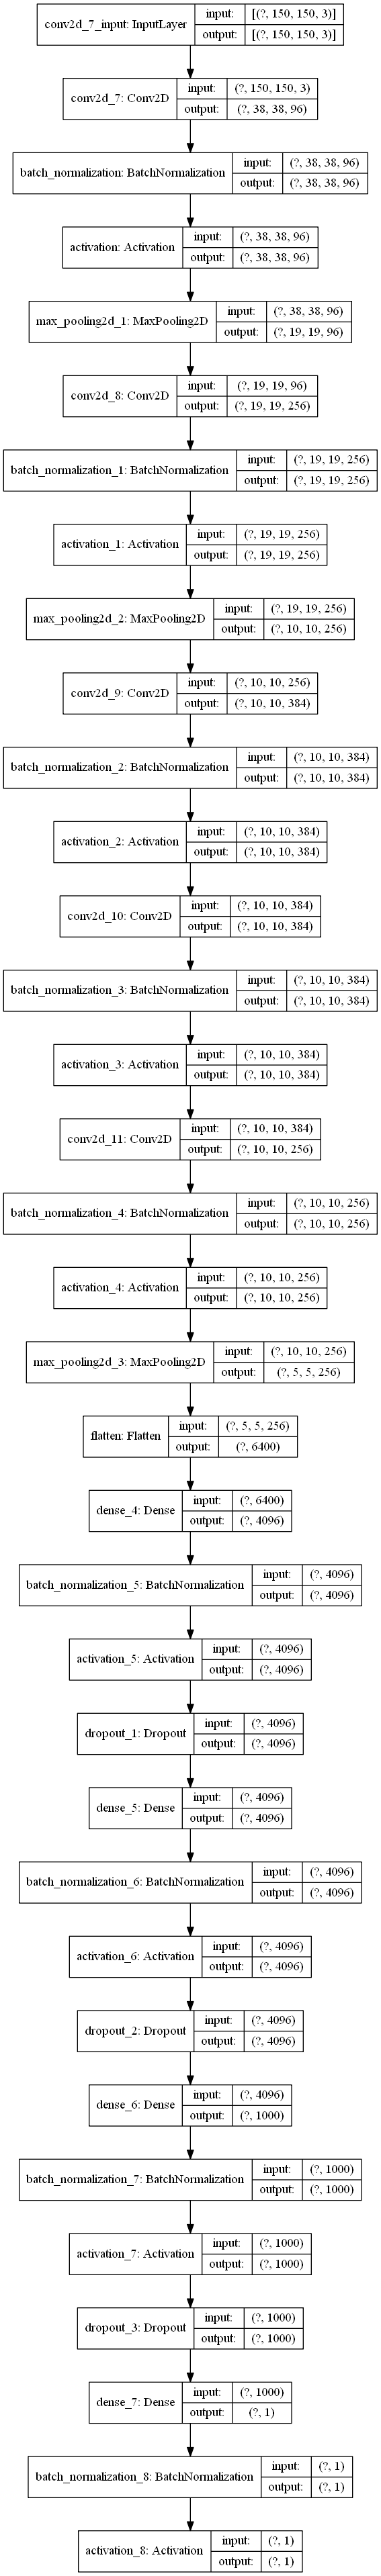

In [4]:
keras.utils.plot_model(makeSimpleResNetModel((150, 150, 3)), "simpleResNet.png", show_shapes=True)
keras.utils.plot_model(makeAlexNet(), "AlexNet.png", show_shapes=True)